# Librerías
Aquí van todas las librerías que usemos, para que al volver a "correr todo", no haya errores tontos :3

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# ETL:

## Ver si hay nulos o NaNs:

In [3]:
df = pd.read_csv('datasets/perretes_final.csv', sep=',')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sample(3)

Dog breed  lifetime_cost  intellingence_ranking  longevity  \
1263        Basenji      22.248330               1.981408  13.215967   
70    Cairn Terrier      22.349792              61.919378  13.707649   
1860   Bull Terrier      17.987910              16.301555  10.042833   

     size_category  weight_kg  shoulder_height_cm intelligence_category  \
1263        medium  10.186461           41.714200                Lowest   
70           small   5.867183           22.577286         Above average   
1860        medium  24.834137           57.245845                  Fair   

     obey_first_command_%_of_time                          genetic_diseases  \
1263                          >30                                      none   
70                            >50              'lion jaw', heart problems     
1860                          >30  heart problems, zinc metabolism disorder   

               house_type owners_physical_activity tricks           Distrito  \
1263  Apartamento pequeño           Poco frecuente    yes             Tetuán   
70                  Finca            Muy frecuente    yes      Ciudad Lineal   
1860  Apartamento mediano                Frecuente    yes  Villa de Vallecas   

      Renta media/pers (€)  Áreas caninas (m²)  
1263               17026.0              1246.0  
70                 16890.0               614.0  
1860               13605.0              1140.0

In [4]:
df.isna().any().any()

False

No hay nulos en ninguna parte del df.

## Ver qué columnas hay y el tipo de cada una:

In [5]:
df.columns,  df.dtypes

(Index(['Dog breed', 'lifetime_cost', 'intellingence_ranking', 'longevity',
        'size_category', 'weight_kg', 'shoulder_height_cm',
        'intelligence_category', 'obey_first_command_%_of_time',
        'genetic_diseases', 'house_type', 'owners_physical_activity', 'tricks',
        'Distrito', 'Renta media/pers (€)', 'Áreas caninas (m²)'],
       dtype='object'),
 Dog breed                        object
 lifetime_cost                   float64
 intellingence_ranking           float64
 longevity                       float64
 size_category                    object
 weight_kg                       float64
 shoulder_height_cm              float64
 intelligence_category            object
 obey_first_command_%_of_time     object
 genetic_diseases                 object
 house_type                       object
 owners_physical_activity         object
 tricks                           object
 Distrito                         object
 Renta media/pers (€)            float64
 Áreas canina

Se puede ver arriba que la columna de lifetime_cost está en el orden de decenas, mientras que sabemos por los datos que tenemos que es en las decenas de miles.

Por lo que se va a corregir multiplicando por 1000:

In [6]:
df['lifetime_cost'] = df['lifetime_cost']*1000
df.sample(3)

Dog breed  lifetime_cost  intellingence_ranking  longevity  \
7               Brittany   22738.408179              81.593408  12.495415   
665   Labrador Retriever   21318.857234              94.571445  12.200610   
2117       Saint Bernard   20278.167333              18.134529   7.861929   

     size_category  weight_kg  shoulder_height_cm intelligence_category  \
7           medium  16.157418           45.388116             Excellent   
665         medium  29.657357           54.457427             Brightest   
2117         large  67.602102           65.735251                  Fair   

     obey_first_command_%_of_time                           genetic_diseases  \
7                             >50                                       none   
665                           >95                         elbows, hips, eyes   
2117                          >30  heart, hip disorders, fatal stomach bloat   

               house_type owners_physical_activity tricks         Distrito  \
7     Apartamento mediano                Frecuente     no  Moncloa-Aravaca   
665         Jardín Amplio                Frecuente    yes        Hortaleza   
2117        Jardín Amplio                Frecuente    yes  Moncloa-Aravaca   

      Renta media/pers (€)  Áreas caninas (m²)  
7                  24659.0              2606.0  
665                20500.0              3852.0  
2117               24659.0              2606.0

Se puede ver también que tenemos varias columnas categóricas, que necesitarían de encodeado.

También se puede ver que la columna obey_first_command_%_of_time no está en int ni en float, y si la observamos es porque tiene un símbolo '>' que se va a quitar:

##### Limpieza de columna obey_first_command_%_of_time

In [7]:
df['obey_first_command_%_of_time'].unique()

array(['>85', '<30', '>50', '>95', '>70', '>30'], dtype=object)

In [8]:
df['obey_first_command_%_of_time'] = df['obey_first_command_%_of_time'].str.strip('>')
df['obey_first_command_%_of_time'] = df['obey_first_command_%_of_time'].str.strip('<')
df['obey_first_command_%_of_time'] = pd.to_numeric(df['obey_first_command_%_of_time'])
df['obey_first_command_%_of_time'].unique()

array([85, 30, 50, 95, 70])

In [9]:
df['obey_first_command_%_of_time'].dtypes

dtype('int64')

**Con esto la limpieza está ya hecha**

## Encoding:

In [10]:
df.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
size_category                    object
weight_kg                       float64
shoulder_height_cm              float64
intelligence_category            object
obey_first_command_%_of_time      int64
genetic_diseases                 object
house_type                       object
owners_physical_activity         object
tricks                           object
Distrito                         object
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
dtype: object

Dog breed y Distrito no se van a encodear, no tiene sentido.

Dog breed, porque su encodeado no lo vamos a usar. Y distrito porque viene de una tabla externa, donde el distrito viene dado por una combinación específica de renta media por persona y áreas caninas.

Las que hay que retocar:


- size_category --> OrdinalEncoder  ['medium', 'small', 'large']


- intelligence_category --> OrdinalEncoder ['Excellent', 'Above average', 'Average', 'Brightest', 'Lowest', 'Fair']


- genetic_diseases --> No está en número, te pone cuáles son. Se pasará de manera "manual" a numérica.


- house_type --> OrdinalEncoder ['Finca', 'Apartamento mediano', 'Jardín Amplio', 'Apartamento pequeño']


- owners_physical_activity --> OrdinalEncoder ['Muy frecuente', 'Nada', 'Poco frecuente', 'Frecuente']


- tricks --> OneHotEncoder ['no', 'yes']

### Adaptación de genetic_diseases a números:

In [11]:
df['genetic_diseases'].unique()

array(['none', "'lion jaw', heart problems  ", 'eye, skin problems',
       'eye problems, deafness, skin + heart problems, blood clotting disorders',
       "'dry eye'", 'liver, sinus problems', 'knee problems',
       'hip, eye, skin problems; enzyme deficiency', 'hip problems',
       'elbows, hips, eyes', 'heart problems', 'eye problems',
       'hip, eye problems', 'elbows, hips, eyes, heart ',
       'heart, spinal problems', 'kidney, eye problems, anaemia',
       'cataracts + other eye problems, connective tissue, nerves, kidneys, spine, blood clotting disorders',
       'blood clotting disorder', 'hip problems, heart defects',
       'birth defects, hip problems',
       'heart problems, zinc metabolism disorder',
       'hip problems, dwarfism', 'fatal stomach bloat, skin problems',
       'eye, hip problems', 'hip, heart problems',
       'heart, hip disorders, fatal stomach bloat'], dtype=object)

Básicamente, si es 'none' es que no tiene, y si tiene es un número determinado por comas:

In [12]:
diseases = df['genetic_diseases']
type(diseases)

pandas.core.series.Series

In [13]:
list_d = []
for d in diseases:
    if d == 'none':
        list_d.append(0)
    else:
        count_comas = d.count(',')
        list_d.append(count_comas+1)

set(list_d)

{0, 1, 2, 3, 4, 6}

In [14]:
df['n_genetic_diseases'] = list_d
df.sample(3)

Dog breed  lifetime_cost  intellingence_ranking  longevity  \
1719      Newfoundland   19583.632192              64.823149   8.982560   
1981        Bloodhound   14626.950046               6.935755   6.784602   
1943  Alaskan Malamute   21532.406927              36.446070  10.703222   

     size_category  weight_kg  shoulder_height_cm intelligence_category  \
1719         large  57.144281           63.066000         Above average   
1981         large  36.823710           66.758232                Lowest   
1943         large  37.101033           56.692422               Average   

      obey_first_command_%_of_time             genetic_diseases  \
1719                            30  hip problems, heart defects   
1981                            95                         none   
1943                            50       hip problems, dwarfism   

               house_type owners_physical_activity tricks    Distrito  \
1719                Finca            Muy frecuente     no   Vicálvaro   
1981  Apartamento mediano            Muy frecuente    yes   Moratalaz   
1943                Finca                     Nada    yes  Arganzuela   

      Renta media/pers (€)  Áreas caninas (m²)  n_genetic_diseases  
1719               13849.0              4410.0                   2  
1981               15667.0              2838.0                   0  
1943               20103.0              1764.0                   2

In [15]:
df['n_genetic_diseases'].dtypes

dtype('int64')

### OneHotEncoder
Recordemos que con este tipo de encoder sólo vamos a adaptar la columna tricks:

In [16]:
# Llamando al encoder
enc1 = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Haciendo el fit y asignandolo a variable del encoder
one_hot_encoded_matrix = enc1.fit_transform(df[['tricks']])

# Pillando solo una columna de la matrix creada, uso la segunda columna
# porque es la que nos da que 1 sea que sí, y 0 que no.
one_hot_encoded_column = one_hot_encoded_matrix[:,1]

# Creando nueva columna con la info de tricks_yes encodeada
df.loc[:, 'tricks_yes'] = one_hot_encoded_column

df.sample(3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Dog breed  lifetime_cost  intellingence_ranking  longevity  \
1375  Pembroke Welsh Corgi   24111.082986              98.652706  11.732060   
804           Irish Setter   19378.593292              61.208093  12.057340   
407              Chihuahua   26898.782698              16.181854  16.553551   

     size_category  weight_kg  shoulder_height_cm intelligence_category  \
1375         small  12.090647           28.124495             Excellent   
804          large  26.689251           69.541165         Above average   
407          small   2.072486           13.595995                  Fair   

      obey_first_command_%_of_time  \
1375                            70   
804                             30   
407                             85   

                                       genetic_diseases           house_type  \
1375  cataracts + other eye problems, connective tis...  Apartamento mediano   
804                                   hip, eye problems        Jardín Amplio   
407                                                none  Apartamento pequeño   

     owners_physical_activity tricks         Distrito  Renta media/pers (€)  \
1375                     Nada     no  Moncloa-Aravaca               24659.0   
804                 Frecuente     no    Ciudad Lineal               16890.0   
407                 Frecuente     no  Moncloa-Aravaca               24659.0   

      Áreas caninas (m²)  n_genetic_diseases  tricks_yes  
1375              2606.0                   6         0.0  
804                614.0                   2         0.0  
407               2606.0                   0         0.0

### OrdinalEncoder
En el ordinal encoder tenemos varias columnas a tratar:
- size_category
- intelligence_category
- house_type
- owners_physical_activity

Creo que esas son todas

In [17]:
df1 = df[['size_category','intelligence_category', 'house_type', 'owners_physical_activity']]

unique_values_dict = {}
for column in df1.columns:
    unique_values_dict[column] = df1[column].unique()

# Display unique values
for column, values in unique_values_dict.items():
    print(f"Unique values in {column}: {values}")

Unique values in size_category: ['medium' 'small' 'large']
Unique values in intelligence_category: ['Excellent' 'Above average' 'Average' 'Brightest' 'Lowest' 'Fair']
Unique values in house_type: ['Finca' 'Apartamento mediano' 'Jardín Amplio' 'Apartamento pequeño']
Unique values in owners_physical_activity: ['Muy frecuente' 'Nada' 'Poco frecuente' 'Frecuente']


In [18]:
## Lo primero es guardar las categorías ordenadas en listas.
cat_size = ['small', 'medium', 'large']
cat_int = ['Lowest', 'Fair', 'Average', 'Above average', 'Excellent', 'Brightest']
cat_house = ['Apartamento pequeño', 'Apartamento mediano', 'Jardín Amplio', 'Finca']
cat_owners_act = ['Nada', 'Poco frecuente', 'Frecuente', 'Muy frecuente']

## Llamando/definiendo al encoder
enc2 = OrdinalEncoder(categories=[cat_size, cat_int, cat_house, cat_owners_act])

## Haciendo el fit y asignando el transform a una variable
data_encoded = enc2.fit_transform(df[['size_category','intelligence_category', 'house_type', 'owners_physical_activity']])

## Asignando columnas en el df a los datos encodeados
df[['size_category_enc','intelligence_category_enc', 'house_type_enc', 'owners_physical_activity_enc']] = data_encoded
df.sample(5)

Dog breed  lifetime_cost  intellingence_ranking  longevity  \
184    Cocker Spaniel   23671.709551              81.541530  12.542524   
791          Shih Tzu   22114.379613              12.319198  12.316952   
1511  Giant Schnauzer   26816.579546              76.856871  10.056002   
13           Brittany   22059.777406              81.669102  12.550427   
195    Cocker Spaniel   23812.962445              78.001440  12.685285   

     size_category  weight_kg  shoulder_height_cm intelligence_category  \
184          small  11.088001           35.819468             Excellent   
791          small   5.989943           24.145274                  Fair   
1511         large  36.123432           64.630913         Above average   
13          medium  16.076722           50.710728             Excellent   
195         medium  11.812712           38.528686             Excellent   

      obey_first_command_%_of_time    genetic_diseases  ... tricks  \
184                             85  eye, skin problems  ...    yes   
791                             95        eye problems  ...    yes   
1511                            50                none  ...     no   
13                              85                none  ...    yes   
195                             85  eye, skin problems  ...     no   

                 Distrito Renta media/pers (€) Áreas caninas (m²)  \
184              Chamberí              25275.0              826.0   
791   Fuencarral-El Pardo              20671.0             1852.0   
1511  Fuencarral-El Pardo              20671.0             1852.0   
13                 Centro              19199.0              326.0   
195              Chamberí              25275.0              826.0   

      n_genetic_diseases  tricks_yes  size_category_enc  \
184                    2         1.0                0.0   
791                    1         1.0                0.0   
1511                   0         0.0                2.0   
13                     0         1.0                1.0   
195                    2         0.0                1.0   

      intelligence_category_enc  house_type_enc  owners_physical_activity_enc  
184                         4.0             2.0                           2.0  
791                         1.0             0.0                           0.0  
1511                        3.0             2.0                           1.0  
13                          4.0             1.0                           1.0  
195                         4.0             2.0                           2.0  

[5 rows x 22 columns]

# EDA
Aquí voy a hacer algún análisis para ver las correlaciones que hay entre las variables y demás, pues eso, EDA.

Pero antes voy a dropear las columnas con tipo object, que no vamos a utilizar:

In [19]:
df.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
size_category                    object
weight_kg                       float64
shoulder_height_cm              float64
intelligence_category            object
obey_first_command_%_of_time      int64
genetic_diseases                 object
house_type                       object
owners_physical_activity         object
tricks                           object
Distrito                         object
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
n_genetic_diseases                int64
tricks_yes                      float64
size_category_enc               float64
intelligence_category_enc       float64
house_type_enc                  float64
owners_physical_activity_enc    float64
dtype: object

In [20]:
df_enc = df.drop([
    'size_category',
    'intelligence_category',
    'genetic_diseases',
    'house_type',
    'owners_physical_activity',
    'tricks',
    'Distrito'
], axis=1)
df_enc.dtypes

Dog breed                        object
lifetime_cost                   float64
intellingence_ranking           float64
longevity                       float64
weight_kg                       float64
shoulder_height_cm              float64
obey_first_command_%_of_time      int64
Renta media/pers (€)            float64
Áreas caninas (m²)              float64
n_genetic_diseases                int64
tricks_yes                      float64
size_category_enc               float64
intelligence_category_enc       float64
house_type_enc                  float64
owners_physical_activity_enc    float64
dtype: object

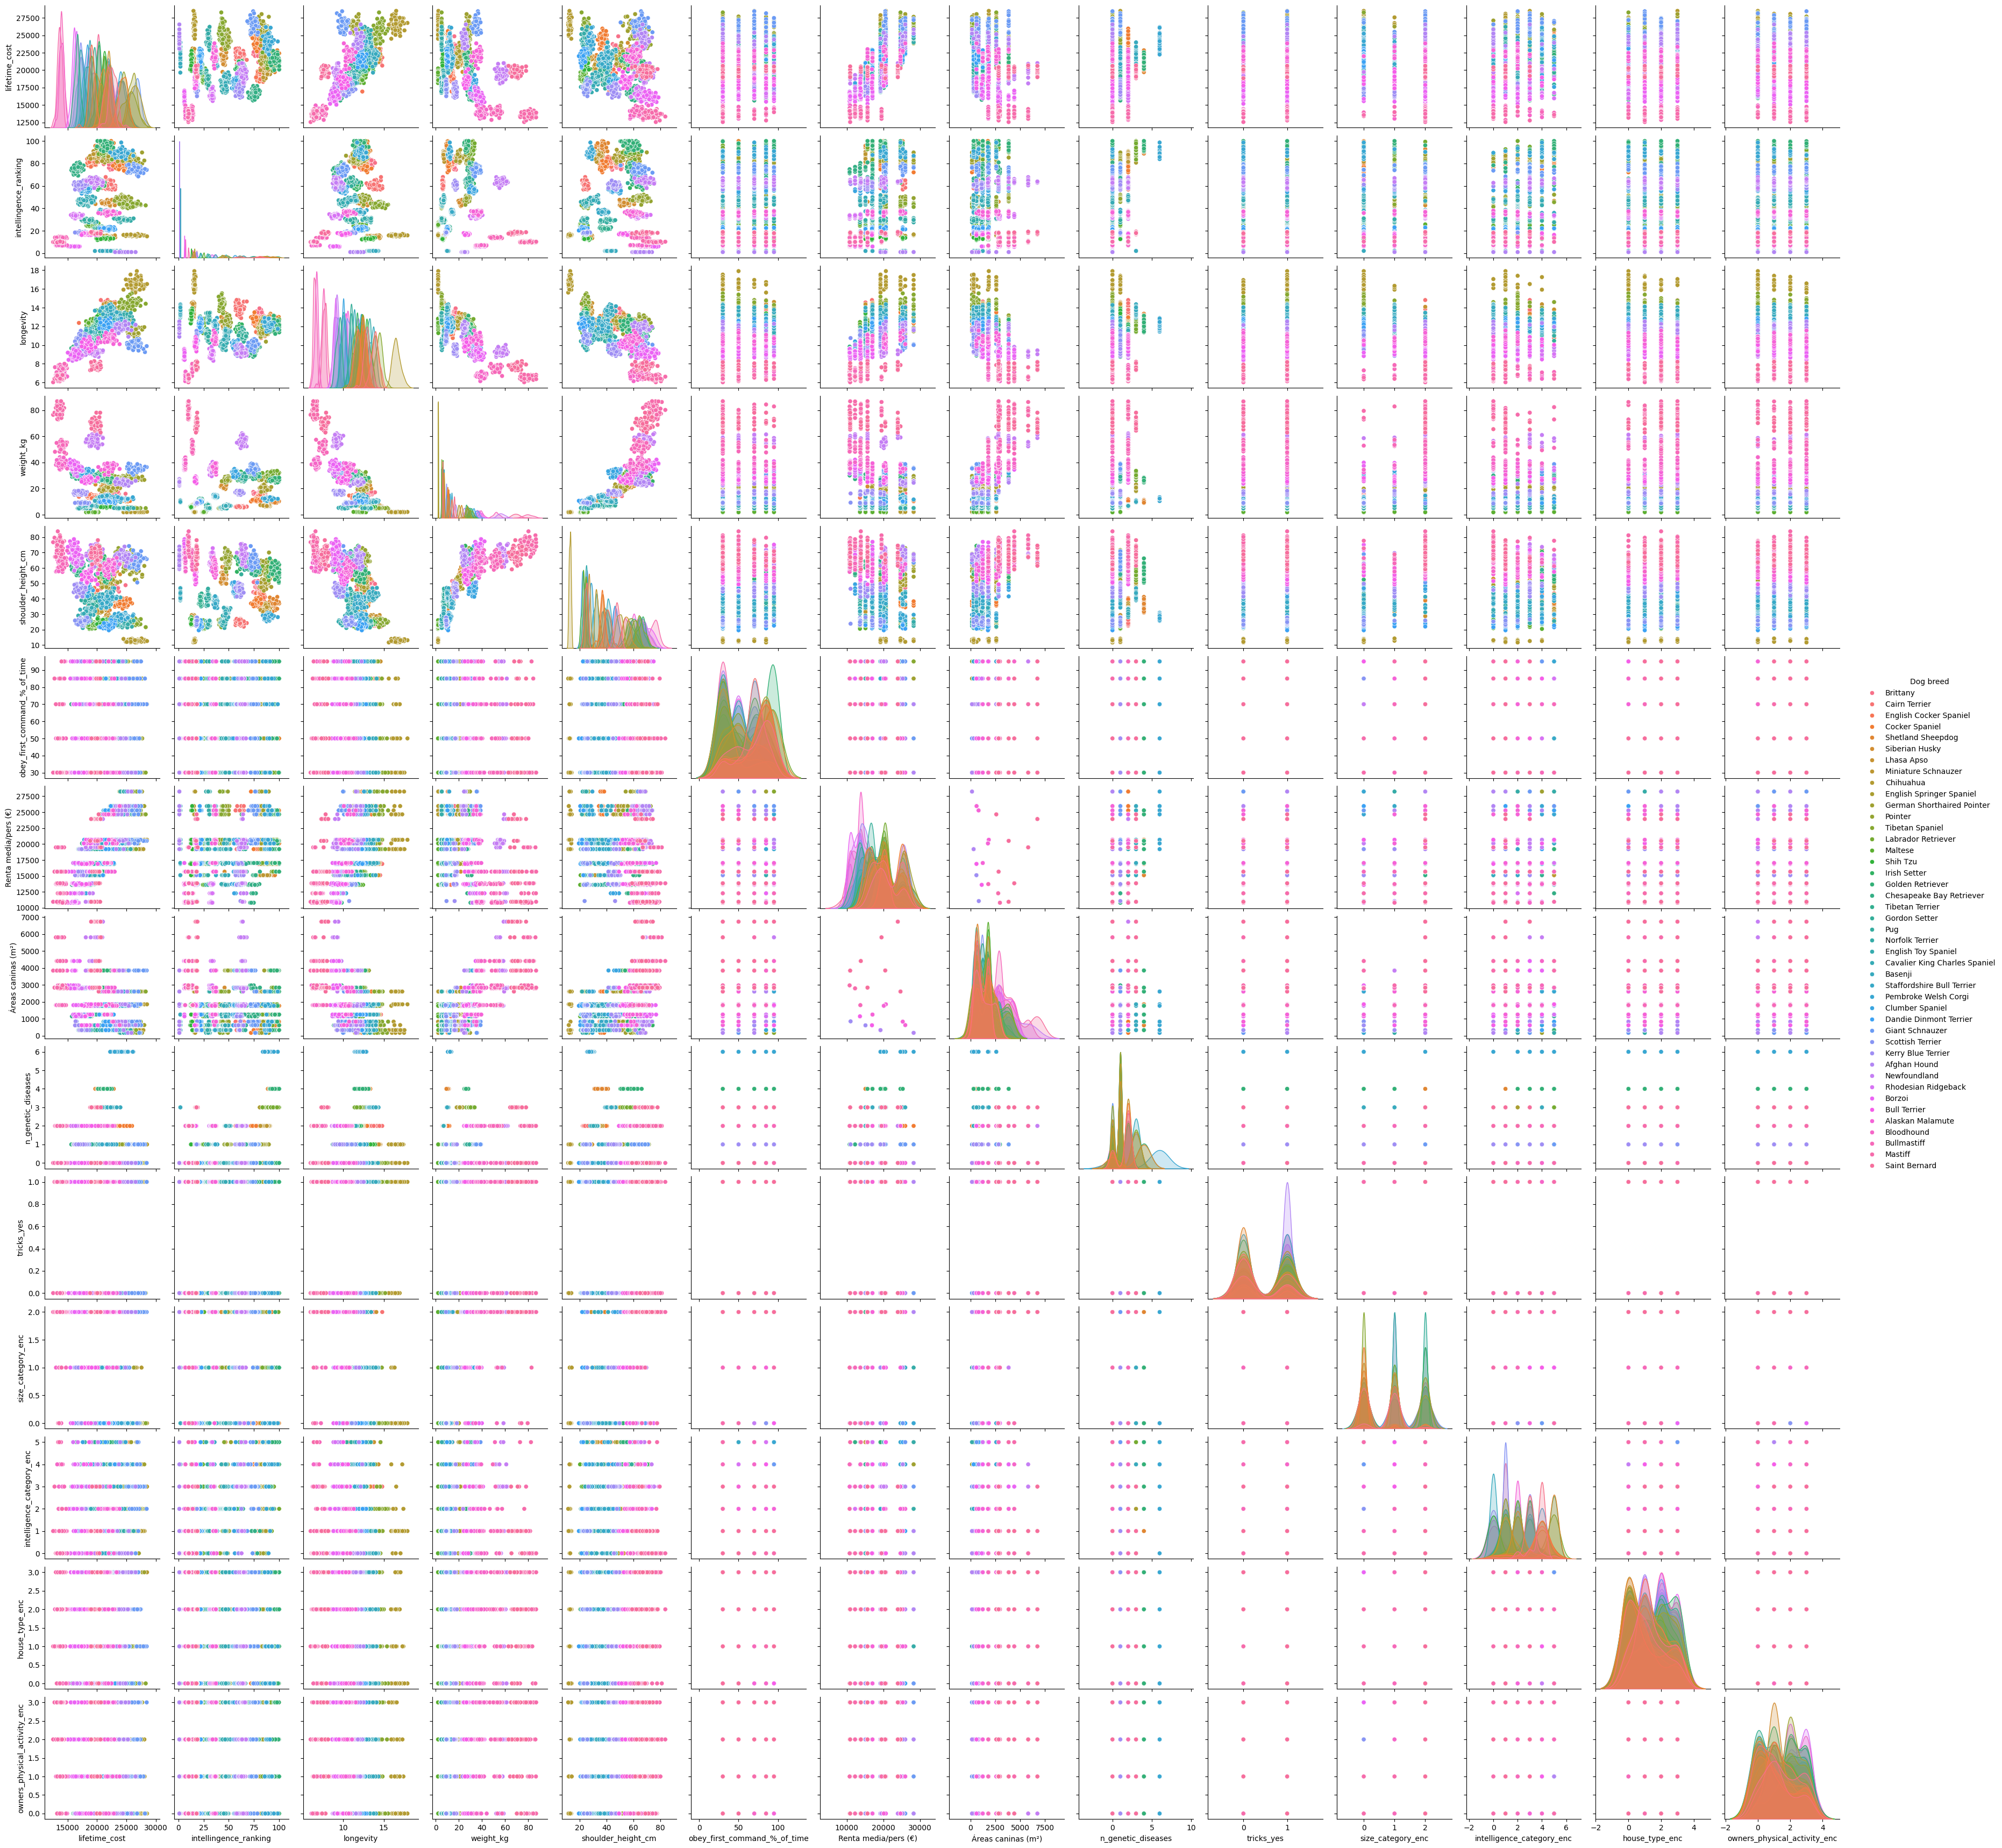

In [21]:
sns.pairplot(df_enc, hue='Dog breed')

En el caso de las primeras variables, las que no son categóricas, se pueden ver correlaciones, pero en el momento que son categóricas, y como hay tantas, es muy complicado verlo aquí.

Así que voy a hacer una matriz de correlación, para poder verlo de manera numérica:

In [22]:
correlation_matrix = df_enc.drop(columns=['Dog breed'],axis=1).corr()
corr_df = pd.DataFrame(correlation_matrix)
corr_df = corr_df.round(3)
corr_df

lifetime_cost  intellingence_ranking  longevity  \
lifetime_cost                         1.000                  0.281      0.740   
intellingence_ranking                 0.281                  1.000      0.173   
longevity                             0.740                  0.173      1.000   
weight_kg                            -0.412                 -0.112     -0.765   
shoulder_height_cm                   -0.304                  0.033     -0.655   
obey_first_command_%_of_time          0.114                  0.516      0.054   
Renta media/pers (€)                  0.710                  0.220      0.519   
Áreas caninas (m²)                   -0.283                 -0.131     -0.479   
n_genetic_diseases                    0.015                  0.257     -0.027   
tricks_yes                           -0.132                 -0.474     -0.081   
size_category_enc                    -0.244                 -0.065     -0.570   
intelligence_category_enc             0.207                  0.786      0.147   
house_type_enc                       -0.101                 -0.032     -0.240   
owners_physical_activity_enc         -0.110                 -0.033     -0.216   

                              weight_kg  shoulder_height_cm  \
lifetime_cost                    -0.412              -0.304   
intellingence_ranking            -0.112               0.033   
longevity                        -0.765              -0.655   
weight_kg                         1.000               0.838   
shoulder_height_cm                0.838               1.000   
obey_first_command_%_of_time     -0.033               0.064   
Renta media/pers (€)             -0.298              -0.215   
Áreas caninas (m²)                0.624               0.483   
n_genetic_diseases                0.105               0.054   
tricks_yes                        0.038              -0.031   
size_category_enc                 0.733               0.859   
intelligence_category_enc        -0.086               0.033   
house_type_enc                    0.307               0.357   
owners_physical_activity_enc      0.271               0.321   

                              obey_first_command_%_of_time  \
lifetime_cost                                        0.114   
intellingence_ranking                                0.516   
longevity                                            0.054   
weight_kg                                           -0.033   
shoulder_height_cm                                   0.064   
obey_first_command_%_of_time                         1.000   
Renta media/pers (€)                                 0.096   
Áreas caninas (m²)                                  -0.051   
n_genetic_diseases                                   0.183   
tricks_yes                                          -0.277   
size_category_enc                                    0.005   
intelligence_category_enc                            0.426   
house_type_enc                                      -0.013   
owners_physical_activity_enc                        -0.018   

                              Renta media/pers (€)  Áreas caninas (m²)  \
lifetime_cost                                0.710              -0.283   
intellingence_ranking                        0.220              -0.131   
longevity                                    0.519              -0.479   
weight_kg                                   -0.298               0.624   
shoulder_height_cm                          -0.215               0.483   
obey_first_command_%_of_time                 0.096              -0.051   
Renta media/pers (€)                         1.000              -0.200   
Áreas caninas (m²)                          -0.200               1.000   
n_genetic_diseases                           0.026               0.115   
tricks_yes                                  -0.116               0.044   
size_category_enc                           -0.190               0.419   
intelligence_category_enc                    0.15

Como la únca relación lo suficientemente fuerte como para decir que están correlacionadas (corr > 0.8) es entre shoulder_height_cm y size_category_enc, no se quita ninguna, porque al ser posibles targets, pueden sernos útiles ambas.

Como el plan que tenemos es hacer 3 "predicciones" de características del perro ideal, hemos elegido, por estudios previos, que íbamos a utilizar:
- Tamaño.
- Longevidad.
- Inteligencia.

Como tanto de tamaño como de inteligencia también está su contraparte categórica, vamos a ver sus relaciones en gráfico:

### Tamaño (shoulder_height_cm ó size_category_enc):

En la variable continua de tamaño hemos priorizado la de altura frente a la de peso, porque parece tener más correlación con las variables provenientes del humano.

#### Altura (shoulder_height_cm)

Para ver la distribución de los datos de altura, a ver cómo están:

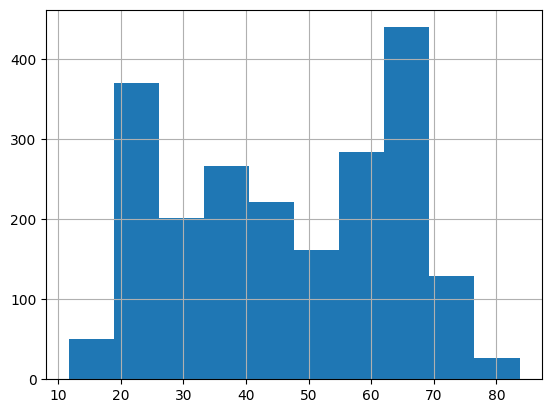

In [23]:
df_enc['shoulder_height_cm'].hist()
plt.show()

In [24]:
df_human = df_enc[['Renta media/pers (€)', 'Áreas caninas (m²)', 'tricks_yes', 'house_type_enc', 'owners_physical_activity_enc']]

<Axes: >

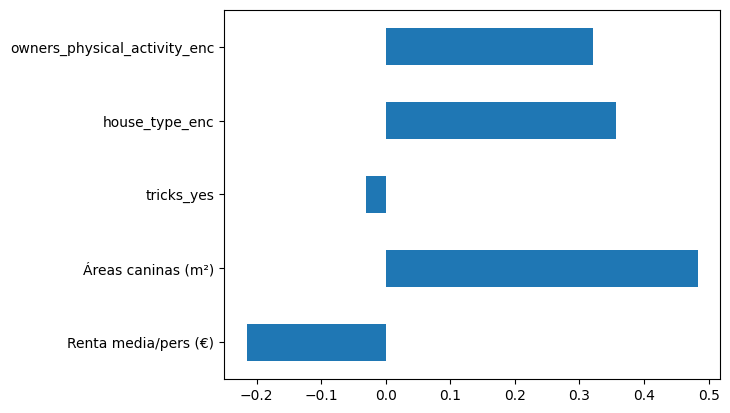

In [25]:
df_human.corrwith(df_enc['shoulder_height_cm']).plot(kind='barh', color='tab:blue')

Vemos que por ejemplo, tricks_yes es la que menos aporta aparentemente para el tamaño, mientras que las áreas caninas es la que más. Como es una correlación de tipo lineal, y no es 0 para tricks_yes, no se va a quitar.

#### Tamaño categórico (size_category_enc)

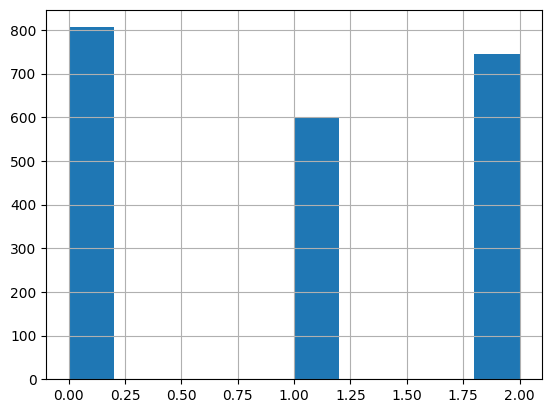

<Axes: >

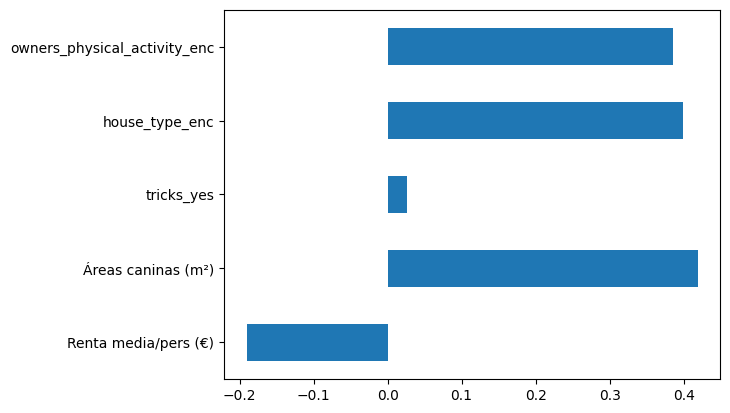

In [26]:
# Voy a repetir exactamente los mismos gráficos de antes, para así tener una idea de la distribución y de las correlaciones lineales:
df_enc['size_category_enc'].hist()
plt.show()

df_human.corrwith(df_enc['size_category_enc']).plot(kind='barh', color='tab:blue')

Como era de esperar, tanto la distribución como las correlaciones son similares a la variable continua.

Y en ambas vemos que cuanta más renta, más propensa es la zona a tener perros más pequeños.

### Longevidad

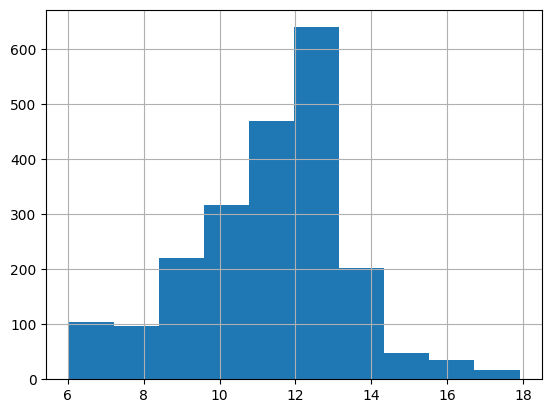

<Axes: >

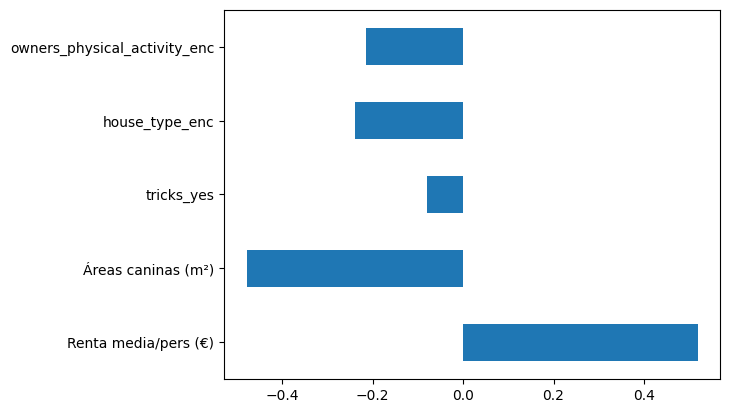

In [27]:
df_enc['longevity'].hist()
plt.show()

df_human.corrwith(df_enc['longevity']).plot(kind='barh', color='tab:blue')

En el caso de la longevidad vemos que la distribución es más de tipo gaussiana, en comparación a la anterior, donde el máximo se encuentra aproximadamente en el medio de la distribución.

Por otra parte nos encontramos que la que más correlación tiene es la renta media, lo cual tiene sentido, ya que en el caso de los humanos pasa algo similar, cuanta más renta, más tiempo de vida medio suele tener el país.

Lo curioso es que todas las demás variables tienen una correlación negativa, como es el caso de la actividad física y las áreas caninas, lo cual va en contra de lo que pensaría uno a priori.

### Inteligencia

#### Continua:

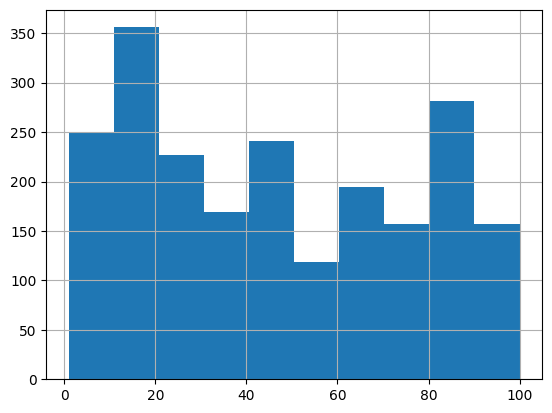

<Axes: >

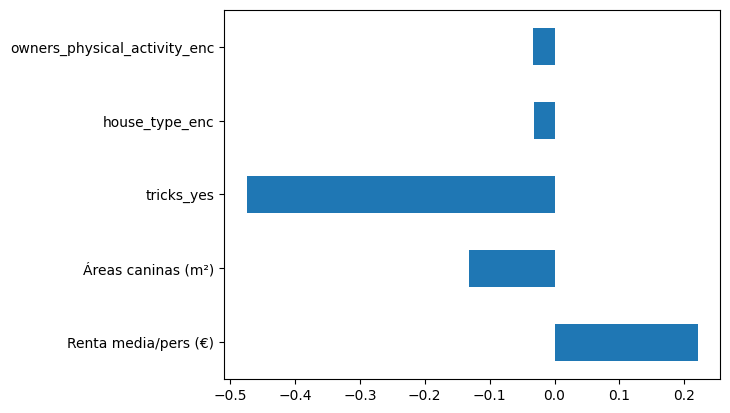

In [28]:
df_enc['intellingence_ranking'].hist()
plt.show()

df_human.corrwith(df_enc['intellingence_ranking']).plot(kind='barh', color='tab:blue')

#### Categórica:

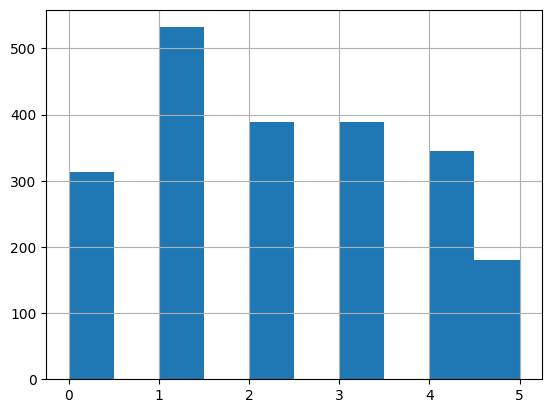

<Axes: >

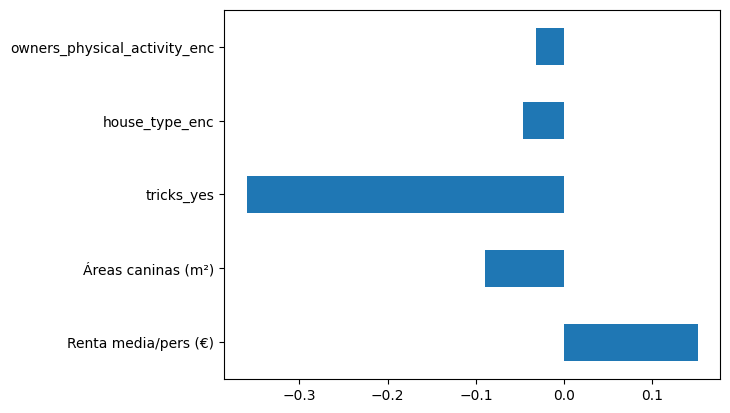

In [29]:
df_enc['intelligence_category_enc'].hist()
plt.show()

df_human.corrwith(df_enc['intelligence_category_enc']).plot(kind='barh', color='tab:blue')

Como era de esperar, tanto categórica como continua presentan la misma distribución y correlaciones.

En cuanto a la distribución vemos que es una distribución normal con el máximo desplazado hacia la izquierda (perros más tontos).

Y en cuanto a las correlaciones vemos que el tricks_yes es el que más aporta, pero de manera negativa, por lo que vamos a comprobar que efectivamente el encodeado haya sido hecho de manera correcta y que, efectivamente, 1 de trick_yes se corresponda a que sí quiere que haga trucos el dueño:

In [30]:
df[['Dog breed', 'tricks', 'tricks_yes']].sample(5)

Dog breed tricks  tricks_yes
167       Cocker Spaniel     no         0.0
2004         Bullmastiff    yes         1.0
2102       Saint Bernard    yes         1.0
696   Labrador Retriever     no         0.0
1531     Giant Schnauzer     no         0.0

Se puede ver que está bien encodeado, por lo que efectivamente en nuestros datos, que el dueño quiera que el perro haga trucos, hace que su perro ideal tienda a ser más tonto.

# Siguientes pasos:

Los siguientes pasos son:


- Hacer Machine Learning para las variables continuas.



- Hacer Machine Learning para las variables categóricas (si las continuas no salen bien).



- Probar a hacer redes neuronales de las variables continuas o categóricas (las que mejor salgan).



- Calcular distancias de las características ideales del perro con un df de razas de perros con esas variables, para calcular compatibilidades.


Para ello necesitamos guardar en un .csv las variables que vamos a utilizar para el ML:

In [31]:
df_enc.sample()

Dog breed  lifetime_cost  intellingence_ranking  longevity  \
1747  Newfoundland   20113.281831              66.022184    9.14092   

      weight_kg  shoulder_height_cm  obey_first_command_%_of_time  \
1747  57.927115           67.726546                            70   

      Renta media/pers (€)  Áreas caninas (m²)  n_genetic_diseases  \
1747               20103.0              1764.0                   0   

      tricks_yes  size_category_enc  intelligence_category_enc  \
1747         0.0                2.0                        3.0   

      house_type_enc  owners_physical_activity_enc  
1747             2.0                           3.0

In [32]:
df_enc.to_csv('datasets/data_for_ml.csv', index=False)

A lo mejor está bien tener las correlaciones para Power BI:

In [34]:
correlation_matrix.to_csv('Datasets/correlaciones_variables.csv', index=False)